In [22]:
# 1. Basic setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. Download ClinVar variant_summary in Colab
!wget -O variant_summary.txt.gz https://ftp.ncbi.nlm.nih.gov/pub/clinvar/tab_delimited/variant_summary.txt.gz


--2025-12-06 00:35:09--  https://ftp.ncbi.nlm.nih.gov/pub/clinvar/tab_delimited/variant_summary.txt.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.31, 130.14.250.10, 130.14.250.11, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 412142377 (393M) [application/x-gzip]
Saving to: ‘variant_summary.txt.gz’

variant_summary.txt 100%[===================>] 393.05M  37.5MB/s    in 11s     

2025-12-06 00:35:20 (37.0 MB/s) - ‘variant_summary.txt.gz’ saved [412142377/412142377]



In [23]:
df = pd.read_csv("variant_summary.txt.gz", sep="\t", compression="gzip", nrows=5)
df.columns


Index(['#AlleleID', 'Type', 'Name', 'GeneID', 'GeneSymbol', 'HGNC_ID',
       'ClinicalSignificance', 'ClinSigSimple', 'LastEvaluated', 'RS# (dbSNP)',
       'nsv/esv (dbVar)', 'RCVaccession', 'PhenotypeIDS', 'PhenotypeList',
       'Origin', 'OriginSimple', 'Assembly', 'ChromosomeAccession',
       'Chromosome', 'Start', 'Stop', 'ReferenceAllele', 'AlternateAllele',
       'Cytogenetic', 'ReviewStatus', 'NumberSubmitters', 'Guidelines',
       'TestedInGTR', 'OtherIDs', 'SubmitterCategories', 'VariationID',
       'PositionVCF', 'ReferenceAlleleVCF', 'AlternateAlleleVCF',
       'SomaticClinicalImpact', 'SomaticClinicalImpactLastEvaluated',
       'ReviewStatusClinicalImpact', 'Oncogenicity',
       'OncogenicityLastEvaluated', 'ReviewStatusOncogenicity',
       'SCVsForAggregateGermlineClassification',
       'SCVsForAggregateSomaticClinicalImpact',
       'SCVsForAggregateOncogenicityClassification'],
      dtype='object')

In [24]:
use_cols = [
    "VariationID",
    "GeneSymbol",
    "Name",   # This contains HGVS notation
    "ClinicalSignificance",
    "ReviewStatus",
    "Chromosome",
    "Start",
    "ReferenceAllele",
    "AlternateAllele"
]

df = pd.read_csv(
    "variant_summary.txt.gz",
    sep="\t",
    compression="gzip",
    low_memory=False,
    usecols=use_cols
)

df.head()


,Name,GeneSymbol,ClinicalSignificance,Chromosome,Start,ReferenceAllele,AlternateAllele,ReviewStatus,VariationID
0,NM_014855.3(AP5Z1):c.80_83delinsTGCTGTAAACTGTA...,AP5Z1,Pathogenic/Likely pathogenic,7,4820844,na,na,"criteria provided, multiple submitters, no con...",2
1,NM_014855.3(AP5Z1):c.80_83delinsTGCTGTAAACTGTA...,AP5Z1,Pathogenic/Likely pathogenic,7,4781213,na,na,"criteria provided, multiple submitters, no con...",2
2,NM_014855.3(AP5Z1):c.1413_1426del (p.Leu473fs),AP5Z1,Pathogenic,7,4827361,na,na,no assertion criteria provided,3
3,NM_014855.3(AP5Z1):c.1413_1426del (p.Leu473fs),AP5Z1,Pathogenic,7,4787730,na,na,no assertion criteria provided,3
4,NM_014630.3(ZNF592):c.3136G>A (p.Gly1046Arg),ZNF592,Uncertain significance,15,85342440,na,na,no assertion criteria provided,4


In [25]:
df = pd.read_csv(
    "variant_summary.txt.gz",
    sep="\t",
    compression="gzip",
    low_memory=False,
    usecols=[
        "Name", "GeneSymbol", "ClinicalSignificance", "Chromosome", "Start",
        "ReferenceAllele", "AlternateAllele", "ReviewStatus", "VariationID"
    ]
)

# Keep only Pathogenic or Benign related labels
keep_labels = ["Pathogenic", "Likely pathogenic",
               "Benign", "Likely benign"]

df = df[df["ClinicalSignificance"].str.contains("|".join(keep_labels), case=False, na=False)]

# Exclude Uncertain significance, conflicting, etc.
exclude_labels = ["Uncertain", "conflict", "not provided", "no assertion"]

df = df[~df["ClinicalSignificance"].str.contains("|".join(exclude_labels), case=False, na=False)]

# Keep only high-confidence review statuses
high_conf = ["multiple submitters, no conflicts", "reviewed by expert panel", "practice guideline"]

df = df[df["ReviewStatus"].str.contains("|".join(high_conf), case=False, na=False)]

df.shape, df.head()


((717513, 9),
                                                  Name GeneSymbol  \
 0   NM_014855.3(AP5Z1):c.80_83delinsTGCTGTAAACTGTA...      AP5Z1   
 1   NM_014855.3(AP5Z1):c.80_83delinsTGCTGTAAACTGTA...      AP5Z1   
 6         NM_017547.4(FOXRED1):c.694C>T (p.Gln232Ter)    FOXRED1   
 7         NM_017547.4(FOXRED1):c.694C>T (p.Gln232Ter)    FOXRED1   
 32            NM_000410.4(HFE):c.848A>C (p.Gln283Pro)        HFE   
 
             ClinicalSignificance Chromosome      Start ReferenceAllele  \
 0   Pathogenic/Likely pathogenic          7    4820844              na   
 1   Pathogenic/Likely pathogenic          7    4781213              na   
 6                     Pathogenic         11  126145284              na   
 7                     Pathogenic         11  126275389              na   
 32  Pathogenic/Likely pathogenic          6   26093144              na   
 
    AlternateAllele                                       ReviewStatus  \
 0               na  criteria provided, mult

In [26]:
df.shape


(717513, 9)

In [27]:
# Split into pathogenic-like and benign-like
pathogenic_mask = df["ClinicalSignificance"].str.contains("Pathogenic", case=False, na=False)
benign_mask = df["ClinicalSignificance"].str.contains("Benign", case=False, na=False)

df_pathogenic = df[pathogenic_mask]
df_benign = df[benign_mask]

print("Pathogenic-like count:", len(df_pathogenic))
print("Benign-like count:", len(df_benign))


Pathogenic-like count: 172579
Benign-like count: 544934


In [28]:
# Sample 100 from each group
path_sample = df_pathogenic.sample(n=100, random_state=42)
ben_sample = df_benign.sample(n=100, random_state=42)

# Combine
df_final = pd.concat([path_sample, ben_sample]).reset_index(drop=True)

# Optional: add a simple binary label column
def simplify_label(x):
    x = x.lower()
    if "pathogenic" in x:
        return "Pathogenic"
    elif "benign" in x:
        return "Benign"
    else:
        return "Other"

df_final["SimpleLabel"] = df_final["ClinicalSignificance"].apply(simplify_label)

# Save final CSV for the project
df_final.to_csv("clinvar_llm_sample.csv", index=False)

df_final.head(), df_final["SimpleLabel"].value_counts()


(                                           Name GeneSymbol  \
 0  NM_001042492.3(NF1):c.3299C>A (p.Ser1100Ter)        NF1   
 1      NM_000159.4(GCDH):c.775T>C (p.Ser259Pro)       GCDH   
 2     NM_000455.5(STK11):c.367C>T (p.Gln123Ter)      STK11   
 3    NM_000260.4(MYO7A):c.3764del (p.Lys1255fs)      MYO7A   
 4   NM_022552.5(DNMT3A):c.1647C>A (p.Cys549Ter)     DNMT3A   
 
   ClinicalSignificance Chromosome     Start ReferenceAllele AlternateAllele  \
 0           Pathogenic         17  29559192              na              na   
 1           Pathogenic         19  12896344              na              na   
 2           Pathogenic         19   1218493              na              na   
 3           Pathogenic         11  76901754              na              na   
 4           Pathogenic          2  25244560              na              na   
 
                                         ReviewStatus  VariationID SimpleLabel  
 0  criteria provided, multiple submitters, no con...    

In [29]:
df_final.head(), df_final["SimpleLabel"].value_counts()


(                                           Name GeneSymbol  \
 0  NM_001042492.3(NF1):c.3299C>A (p.Ser1100Ter)        NF1   
 1      NM_000159.4(GCDH):c.775T>C (p.Ser259Pro)       GCDH   
 2     NM_000455.5(STK11):c.367C>T (p.Gln123Ter)      STK11   
 3    NM_000260.4(MYO7A):c.3764del (p.Lys1255fs)      MYO7A   
 4   NM_022552.5(DNMT3A):c.1647C>A (p.Cys549Ter)     DNMT3A   
 
   ClinicalSignificance Chromosome     Start ReferenceAllele AlternateAllele  \
 0           Pathogenic         17  29559192              na              na   
 1           Pathogenic         19  12896344              na              na   
 2           Pathogenic         19   1218493              na              na   
 3           Pathogenic         11  76901754              na              na   
 4           Pathogenic          2  25244560              na              na   
 
                                         ReviewStatus  VariationID SimpleLabel  
 0  criteria provided, multiple submitters, no con...    

In [30]:
import pandas as pd

# Load your final balanced dataset
df_final = pd.read_csv("clinvar_llm_sample.csv")

# Create prompt file WITHOUT labels
prompt_df = df_final[["VariationID", "GeneSymbol", "Name"]].copy()

# Save it
prompt_df.to_csv("prompts_for_llm.csv", index=False)

prompt_df.head()


,VariationID,GeneSymbol,Name
0,952266,NF1,NM_001042492.3(NF1):c.3299C>A (p.Ser1100Ter)
1,1383091,GCDH,NM_000159.4(GCDH):c.775T>C (p.Ser259Pro)
2,428761,STK11,NM_000455.5(STK11):c.367C>T (p.Gln123Ter)
3,43223,MYO7A,NM_000260.4(MYO7A):c.3764del (p.Lys1255fs)
4,1332907,DNMT3A,NM_022552.5(DNMT3A):c.1647C>A (p.Cys549Ter)


In [31]:
import pandas as pd

claude = pd.read_csv("claude.csv")
gemini = pd.read_csv("gemini.csv")
chatgpt = pd.read_csv("chatgpt.csv")

print("Claude columns:", claude.columns.tolist())
print("Gemini columns:", gemini.columns.tolist())
print("ChatGPT columns:", chatgpt.columns.tolist())


Claude columns: ['VariationID', 'GeneSymbol', 'Name', 'Claude_pred']
Gemini columns: ['VariationID', 'GeneSymbol', 'Name', 'Gemini_pred']
ChatGPT columns: ['VariationID', 'GeneSymbol', 'Name', 'ChatGPT_pred']


In [32]:
import pandas as pd

# Load your base dataset with true labels
df_final = pd.read_csv("clinvar_llm_sample.csv")   # contains SimpleLabel

# Load model predictions
claude = pd.read_csv("claude.csv")
gemini = pd.read_csv("gemini.csv")
chatgpt = pd.read_csv("chatgpt.csv")

# Merge all together using VariationID
merged = df_final.merge(chatgpt, on=["VariationID", "GeneSymbol", "Name"], how="left")
merged = merged.merge(gemini, on=["VariationID", "GeneSymbol", "Name"], how="left")
merged = merged.merge(claude, on=["VariationID", "GeneSymbol", "Name"], how="left")

merged.head()


,Name,GeneSymbol,ClinicalSignificance,Chromosome,Start,ReferenceAllele,AlternateAllele,ReviewStatus,VariationID,SimpleLabel,ChatGPT_pred,Gemini_pred,Claude_pred
0,NM_001042492.3(NF1):c.3299C>A (p.Ser1100Ter),NF1,Pathogenic,17,29559192,na,na,"criteria provided, multiple submitters, no con...",952266,Pathogenic,Pathogenic,Pathogenic,Pathogenic
1,NM_000159.4(GCDH):c.775T>C (p.Ser259Pro),GCDH,Pathogenic,19,12896344,na,na,"criteria provided, multiple submitters, no con...",1383091,Pathogenic,Benign,Benign,Benign
2,NM_000455.5(STK11):c.367C>T (p.Gln123Ter),STK11,Pathogenic,19,1218493,na,na,"criteria provided, multiple submitters, no con...",428761,Pathogenic,Pathogenic,Pathogenic,Pathogenic
3,NM_000260.4(MYO7A):c.3764del (p.Lys1255fs),MYO7A,Pathogenic,11,76901754,na,na,"criteria provided, multiple submitters, no con...",43223,Pathogenic,Pathogenic,Pathogenic,Pathogenic
4,NM_022552.5(DNMT3A):c.1647C>A (p.Cys549Ter),DNMT3A,Pathogenic,2,25244560,na,na,"criteria provided, multiple submitters, no con...",1332907,Pathogenic,Pathogenic,Pathogenic,Pathogenic


In [33]:
def normalize_label(x):
    if isinstance(x, str):
        x = x.lower()
        if "pathogenic" in x:
            return "Pathogenic"
        if "benign" in x:
            return "Benign"
    return None

merged["TrueLabel"] = merged["SimpleLabel"].apply(normalize_label)
merged["ChatGPT_clean"] = merged["ChatGPT_pred"].apply(normalize_label)
merged["Gemini_clean"] = merged["Gemini_pred"].apply(normalize_label)
merged["Claude_clean"] = merged["Claude_pred"].apply(normalize_label)

merged.head()


,Name,GeneSymbol,ClinicalSignificance,Chromosome,Start,ReferenceAllele,AlternateAllele,ReviewStatus,VariationID,SimpleLabel,ChatGPT_pred,Gemini_pred,Claude_pred,TrueLabel,ChatGPT_clean,Gemini_clean,Claude_clean
0,NM_001042492.3(NF1):c.3299C>A (p.Ser1100Ter),NF1,Pathogenic,17,29559192,na,na,"criteria provided, multiple submitters, no con...",952266,Pathogenic,Pathogenic,Pathogenic,Pathogenic,Pathogenic,Pathogenic,Pathogenic,Pathogenic
1,NM_000159.4(GCDH):c.775T>C (p.Ser259Pro),GCDH,Pathogenic,19,12896344,na,na,"criteria provided, multiple submitters, no con...",1383091,Pathogenic,Benign,Benign,Benign,Pathogenic,Benign,Benign,Benign
2,NM_000455.5(STK11):c.367C>T (p.Gln123Ter),STK11,Pathogenic,19,1218493,na,na,"criteria provided, multiple submitters, no con...",428761,Pathogenic,Pathogenic,Pathogenic,Pathogenic,Pathogenic,Pathogenic,Pathogenic,Pathogenic
3,NM_000260.4(MYO7A):c.3764del (p.Lys1255fs),MYO7A,Pathogenic,11,76901754,na,na,"criteria provided, multiple submitters, no con...",43223,Pathogenic,Pathogenic,Pathogenic,Pathogenic,Pathogenic,Pathogenic,Pathogenic,Pathogenic
4,NM_022552.5(DNMT3A):c.1647C>A (p.Cys549Ter),DNMT3A,Pathogenic,2,25244560,na,na,"criteria provided, multiple submitters, no con...",1332907,Pathogenic,Pathogenic,Pathogenic,Pathogenic,Pathogenic,Pathogenic,Pathogenic,Pathogenic


In [43]:
import pandas as pd

# 1. Load ground-truth dataset
df = pd.read_csv("clinvar_llm_sample.csv")

# 2. Load model predictions with only needed columns
chatgpt = pd.read_csv("chatgpt.csv")[["VariationID", "ChatGPT_pred"]]
gemini = pd.read_csv("gemini.csv")[["VariationID", "Gemini_pred"]]
claude = pd.read_csv("claude.csv")[["VariationID", "Claude_pred"]]

# 3. Merge all predictions into one file
merged = (
    df
    .merge(chatgpt, on="VariationID")
    .merge(gemini, on="VariationID")
    .merge(claude, on="VariationID")
)

# 4. Save final combined file
merged.to_csv("final_predictions.csv", index=False)

merged.head()


,Name,GeneSymbol,ClinicalSignificance,Chromosome,Start,ReferenceAllele,AlternateAllele,ReviewStatus,VariationID,SimpleLabel,ChatGPT_pred,Gemini_pred,Claude_pred
0,NM_001042492.3(NF1):c.3299C>A (p.Ser1100Ter),NF1,Pathogenic,17,29559192,na,na,"criteria provided, multiple submitters, no con...",952266,Pathogenic,Pathogenic,Pathogenic,Pathogenic
1,NM_000159.4(GCDH):c.775T>C (p.Ser259Pro),GCDH,Pathogenic,19,12896344,na,na,"criteria provided, multiple submitters, no con...",1383091,Pathogenic,Benign,Benign,Benign
2,NM_000455.5(STK11):c.367C>T (p.Gln123Ter),STK11,Pathogenic,19,1218493,na,na,"criteria provided, multiple submitters, no con...",428761,Pathogenic,Pathogenic,Pathogenic,Pathogenic
3,NM_000260.4(MYO7A):c.3764del (p.Lys1255fs),MYO7A,Pathogenic,11,76901754,na,na,"criteria provided, multiple submitters, no con...",43223,Pathogenic,Pathogenic,Pathogenic,Pathogenic
4,NM_022552.5(DNMT3A):c.1647C>A (p.Cys549Ter),DNMT3A,Pathogenic,2,25244560,na,na,"criteria provided, multiple submitters, no con...",1332907,Pathogenic,Pathogenic,Pathogenic,Pathogenic


In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

def evaluate(df, pred_col, model_name):
    print(f"\n================= {model_name} =================")

    sub = df[["TrueLabel", pred_col]].dropna()
    y_true = sub["TrueLabel"]
    y_pred = sub[pred_col]

    # Accuracy
    acc = accuracy_score(y_true, y_pred)
    print("Accuracy:", round(acc, 3))

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, digits=3))

    # Confusion Matrix
    labels = ["Pathogenic", "Benign"]
    cm = confusion_matrix(y_true, y_pred, labels=labels)

    print("\nConfusion Matrix:")
    print(pd.DataFrame(cm, index=labels, columns=labels))

    # Plot matrix
    plt.figure(figsize=(4,4))
    plt.imshow(cm, cmap="Blues")
    plt.xticks([0,1], labels)
    plt.yticks([0,1], labels)
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")

    for i in range(2):
        for j in range(2):
            plt.text(j, i, cm[i, j], ha="center", va="center", fontsize=12)

    plt.colorbar()
    plt.show()



================= ChatGPT =================
Accuracy: 0.825

Classification Report:
              precision    recall  f1-score   support

      Benign      0.741     1.000     0.851       100
  Pathogenic      1.000     0.650     0.788       100

    accuracy                          0.825       200
   macro avg      0.870     0.825     0.819       200
weighted avg      0.870     0.825     0.819       200


Confusion Matrix:
            Pathogenic  Benign
Pathogenic          65      35
Benign               0     100


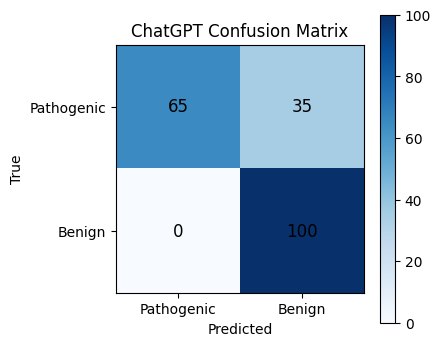


================= Gemini =================
Accuracy: 0.88

Classification Report:
              precision    recall  f1-score   support

      Benign      0.811     0.990     0.892       100
  Pathogenic      0.987     0.770     0.865       100

    accuracy                          0.880       200
   macro avg      0.899     0.880     0.879       200
weighted avg      0.899     0.880     0.879       200


Confusion Matrix:
            Pathogenic  Benign
Pathogenic          77      23
Benign               1      99


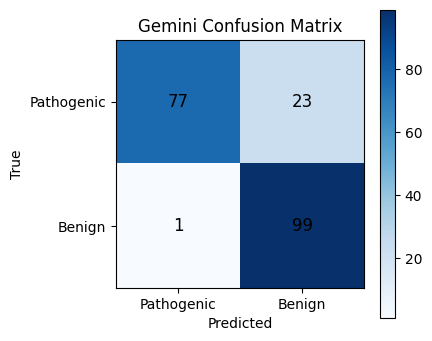


================= Claude =================
Accuracy: 0.89

Classification Report:
              precision    recall  f1-score   support

      Benign      0.825     0.990     0.900       100
  Pathogenic      0.988     0.790     0.878       100

    accuracy                          0.890       200
   macro avg      0.906     0.890     0.889       200
weighted avg      0.906     0.890     0.889       200


Confusion Matrix:
            Pathogenic  Benign
Pathogenic          79      21
Benign               1      99


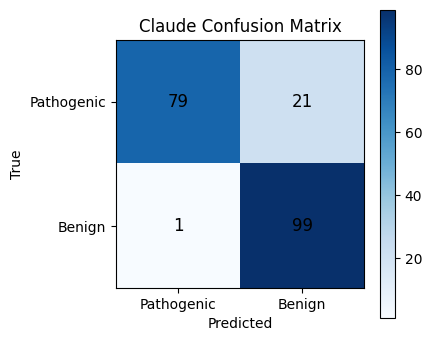

In [35]:
evaluate(merged, "ChatGPT_clean", "ChatGPT")
evaluate(merged, "Gemini_clean", "Gemini")
evaluate(merged, "Claude_clean", "Claude")


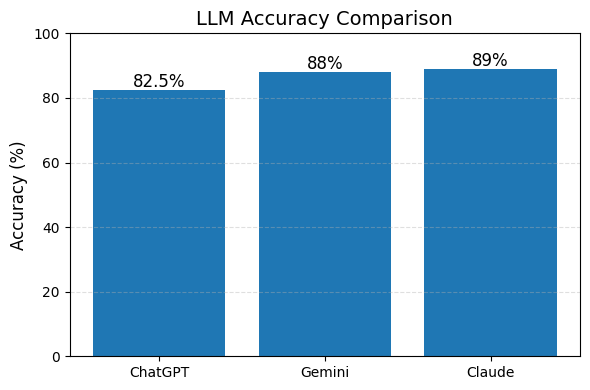

Saved as llm_accuracy_chart.png


In [36]:
import matplotlib.pyplot as plt

# Accuracy values
models = ['ChatGPT', 'Gemini', 'Claude']
accuracy = [82.5, 88, 89]

# Create bar chart
plt.figure(figsize=(6,4))
bars = plt.bar(models, accuracy)

# Add labels above bars
for bar, acc in zip(bars, accuracy):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        acc + 1,
        f"{acc}%",
        ha='center',
        fontsize=12
    )

# Axis labels and title
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('LLM Accuracy Comparison', fontsize=14)
plt.ylim(0, 100)

plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()

# Save chart
plt.savefig("llm_accuracy_chart.png", dpi=300)
plt.show()

print("Saved as llm_accuracy_chart.png")
